## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Verify for complete data and find the key ID
mouse_metadata.count()
study_results.count()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df
# Display the data table for preview
merge_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [8]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.
duplicate_df = merge_df[merge_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_df[['Mouse ID']].describe()

,Mouse ID
count,1883
unique,249
top,z795
freq,10


## Summary Statistics

In [12]:
# Show columns
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_df = clean_df[['Mouse ID', 
                     'Drug Regimen', 
                     'Sex', 
                     'Age_months', 
                     'Weight (g)', 
                     'Timepoint', 
                     'Tumor Volume (mm3)', 
                     'Metastatic Sites']].copy()

grouped_stats_df = stats_df.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stats_mean = grouped_stats_df['Tumor Volume (mm3)'].mean()
stats_med = grouped_stats_df['Tumor Volume (mm3)'].median()
stats_var = grouped_stats_df['Tumor Volume (mm3)'].var()
stats_std = grouped_stats_df['Tumor Volume (mm3)'].std()
stats_sem = grouped_stats_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
stats_output_df = pd.DataFrame({'Tumor Volume (mm3) mean': stats_mean,
                                'Tumor Volume (mm3) median': stats_med,
                                'Tumor Volume (mm3) variance': stats_var, 
                                'Tumor Volume (mm3) std': stats_std, 
                                'Tumor Volume (mm3) SE': stats_sem
                               })
    
stats_output_df

,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) variance,Tumor Volume (mm3) std,Tumor Volume (mm3) SE
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Qty of Measurements Taken for each Treatment Regimen'>

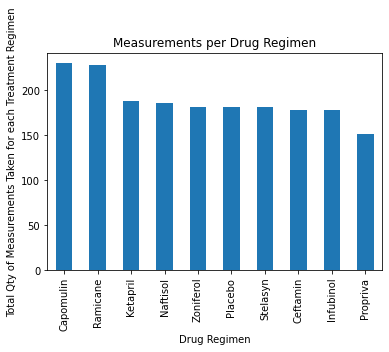

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barplot = clean_df["Drug Regimen"].value_counts().plot.bar()
barplot.set_title("Measurements per Drug Regimen")
barplot.set_xlabel("Drug Regimen")
barplot.set_ylabel("Total Qty of Measurements Taken for each Treatment Regimen")
barplot


Text(0, 0.5, 'Total Qty of Measurements Taken for each Treatment Regimen')

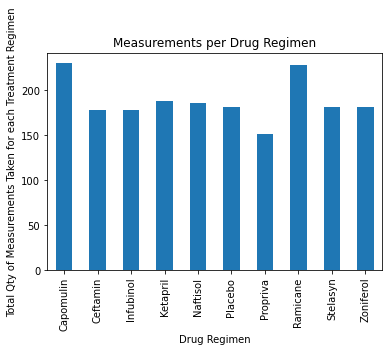

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_groups = clean_df.groupby('Drug Regimen')

# Find out how many of each gender took bike trips
drug_measurements = drug_groups['Tumor Volume (mm3)'].count()

# Chart our data, give it a title, and label the axes
measurement_chart = drug_measurements.plot(kind="bar", title="Measurements per Drug Regimen")
measurement_chart.set_xlabel("Drug Regimen")
measurement_chart.set_ylabel("Total Qty of Measurements Taken for each Treatment Regimen")

#plt.bar(barplot, measurements, color="b", align="center")

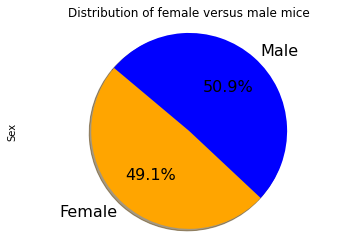

In [21]:
# First create a dataframe grouping by the 'Sex' column
gender_group = clean_df.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

# View the groupby dataframe
gender_group_count.head()

# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["orange","blue"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.show()


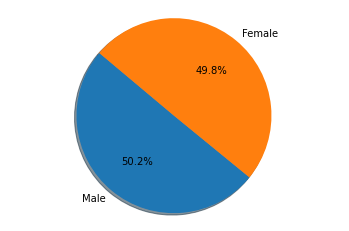

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male","Female"]
males = clean_df.loc[clean_df['Sex'].isin(["Male"])]
females = clean_df.loc[clean_df['Sex'].isin(["Female"])]

male_count = males['Mouse ID'].nunique()
female_count = females['Mouse ID'].nunique()

plt.pie([male_count, female_count], labels=gender, 
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_drugs = clean_df.loc[clean_df['Drug Regimen'].isin(["Capomulin",
                                                             "Ramicane",
                                                             "Infubinol",
                                                             "Ceftamin"])]
filtered_drugs['Drug Regimen'].nunique()

4

In [44]:
# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_time_df = pd.DataFrame({"Timepoint": max_time})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(clean_df, max_time_df, how="inner", on=["Mouse ID","Timepoint"])
tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
results =[]

# Calculate the IQR[ and quantitatively determine if there are any potential outliers.
tumor = tumor_df['Tumor Volume (mm3)']

quartiles = tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(upperq)
print(lowerq)

for treatment in treatments:
    # print(treatment)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_size = tumor_df.loc[tumor_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    # print(tumor_size)
    
    # add subset
    results.append(tumor_size)
    
# Determine outliers using upper and lower bounds
# outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
# outlier_occupancy

print(results)

64.95756185
45.93471217
[1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
181    46.539206
Name: Tumor Volume (mm3), dtype: float64, 0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
26    36.561652
27    37.311236
29    38.342008
33    38.407618
41    40.659006
42    40.667713
43    45.220869
44    43.047543
46    43.419381
47    43.166373
48    44.183451
Name: Tumor Volume (mm3), dtype: float64, 49     67.973419
50     65.525743
57     57.031862
58     66.08306

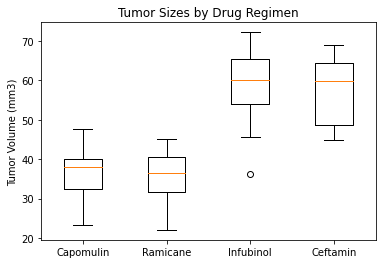

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# results.boxplot(by='Drug Regimen')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Sizes by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(results,labels=treatments)
plt.show()




## Line and Scatter Plots

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

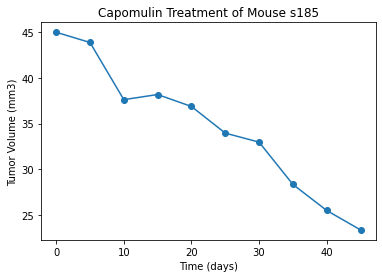

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo = clean_df.loc[(merge_df['Drug Regimen'] == "Capomulin")]
print(capo)


# Identify data points of a mouse treated with Capomulin
mouse = clean_df.loc[clean_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

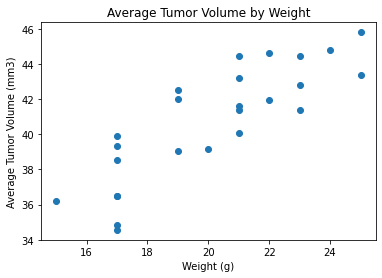

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo = clean_df.loc[(merge_df['Drug Regimen'] == "Capomulin")]

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capo, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Duplicate code for scatter plot from above:

capo = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capo, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


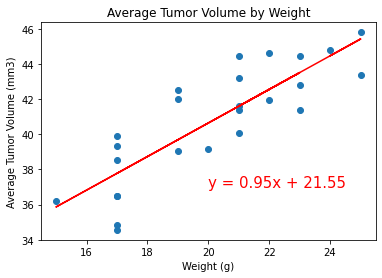

In [33]:
# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()